In [84]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2) # unlike pca here we have to fit transform X_train and y_train
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test) # only transform for X_test_lda as we dont pass y_test

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # default n val is 5
knn.fit(X_train_lda,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
y_pred = knn.predict(X_test_lda)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9555555555555556

Text(0, 0.5, 'Second LDA Component')

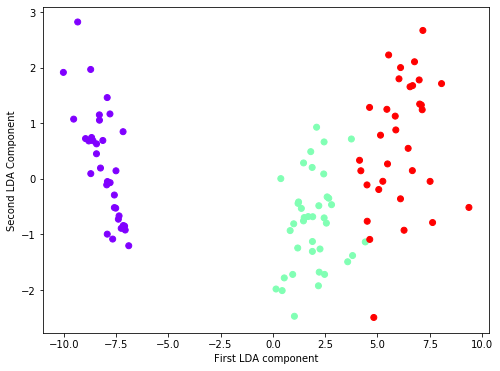

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[:,0],X_train_lda[:,1],c=y_train,cmap='rainbow')
plt.xlabel('First LDA component')
plt.ylabel('Second LDA Component')